In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

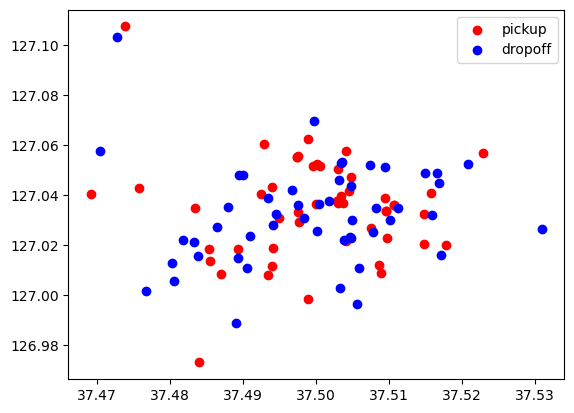

In [8]:
prob = json.load(open('../../alg_test_problems_20240429/TEST_K50_1.json'))
dist_mat = np.array(prob['DIST'])
orders = np.array(prob['ORDERS'])
pickup_coord = orders[:, 2:4]
dropoff_coord = orders[:, 4:6]
K = 50

plt.scatter(pickup_coord[:,0], pickup_coord[:,1], c='r', label='pickup')
plt.scatter(dropoff_coord[:,0], dropoff_coord[:,1], c='b', label='dropoff')
plt.legend()
plt.show()

/home/jung/anaconda3/envs/ogc2024/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 5 2 3 2 5 2 5 3 2 6 0 2 6 2 7 3 3 1 5 3 4 0 5 2 0 2 2 6 5 3 6 5 3 2 2
 6 5 2 2 5 2 6 3 3 2 6 3 2]


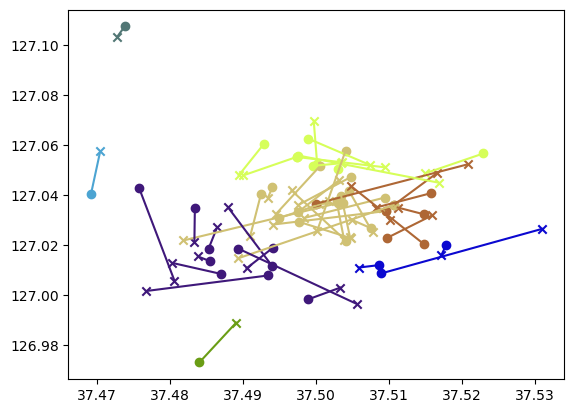

In [48]:
pickups = dist_mat[:K, :K]
delvs = dist_mat[K:, K:]
pickup_to_delvs = dist_mat[:K, K:]
delv_to_pickups = dist_mat[K:, :K]
# (pickup_to_delvs + delv_to_pickups) / 2
# pickup_to_delvs, delv_to_pickups

alpha, beta, gamma = 1, 1, 1
sum_mat = alpha * pickups + beta * delvs + gamma * (pickup_to_delvs + delv_to_pickups) / 2

cluster = KMeans(n_clusters=8)
# cluster = DBSCAN(eps=0.5, min_samples=2)
# cluster = AgglomerativeClustering(n_clusters=8)
labels = cluster.fit_predict(sum_mat)
print(labels)

# color = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']
colors = np.random.uniform(0, 1, (K, 3))
for i in range(K):
    label = labels[i]
    pickup_x, pickup_y = pickup_coord[i]
    dropoff_x, dropoff_y = dropoff_coord[i]
    color = colors[label]
    plt.scatter(pickup_x, pickup_y, color=color)
    plt.scatter(dropoff_x, dropoff_y, color=color, marker='x')
    plt.plot([pickup_x, dropoff_x], [pickup_y, dropoff_y], color=color)
    
# plt.scatter(pickup_coord[:,0], pickup_coord[:,1], c='r', label='pickup')
# plt.scatter(dropoff_coord[:,0], dropoff_coord[:,1], c='b', label='dropoff')
# plt.legend()
plt.show()